In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import os

In [ ]:
import zipfile

zip_path = '/content/datasetresize.zip'
extract_path = '/content/'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'File berhasil diekstrak ke {extract_path}')

File berhasil diekstrak ke /content/


In [ ]:
image_dir = '/content/datasetresize'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(1000, 900))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1000, 900, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    X, y,
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37s/step - loss: 230983.2188 - mae: 428.0941
Epoch 1: loss improved from inf to 230983.21875, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step - loss: 230983.2188 - mae: 428.0941
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54s/step - loss: 50779.4648 - mae: 139.7422
Epoch 2: loss improved from 230983.21875 to 50779.46484, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 75s 75s/step - loss: 50779.4648 - mae: 139.7422
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58s/step - loss: 444812.3438 - mae: 636.7399
Epoch 3: loss did not improve from 50779.46484
1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step - loss: 444812.3438 - mae: 636.7399
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41s/step - loss: 49120.6562 - mae: 198.3309
Epoch 4: loss improved from 50779.46484 to 49120.65625, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step - loss: 49120.6562 - mae: 198.3309
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46s/step - loss: 89824.9531 - mae: 217.3696
Epoch 5: loss did not improve from 49120.65625
1/1 ━━━━━━━━━━━━━━━━━━━━ 46s 46s/step - loss: 89824.9531 - mae: 217.3696
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39s/step - loss: 142481.4688 - mae: 311.1794
Epoch 6: loss did not improve from 49120.65625
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - loss: 142481.4688 - mae: 311.1794
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41s/step - loss: 162795.5000 - mae: 341.9533
Epoch 7: loss did not improve from 49120.65625
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step - loss: 162795.5000 - mae: 341.9533
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42s/step - loss: 162235.3906 - mae: 341.3182
Epoch 8: loss did not improve from 49120.65625
1/1 ━━━━━━━━━━━━━━━━━━━━ 42s 42s/step - loss: 162235.3906 - mae: 341.3182
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41s/step - loss: 149925.2969 - mae: 323.3163
Epoch 9: loss did not imp

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/test_dataset.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/test_dataset'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

File berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


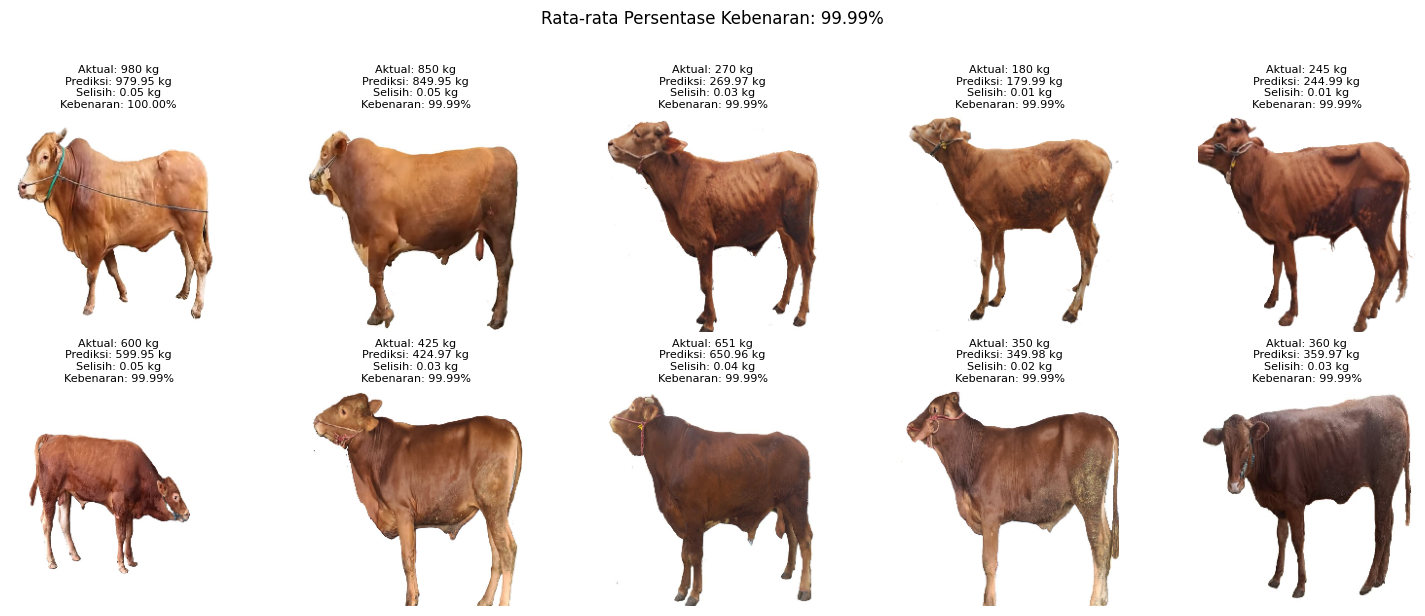

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/datasetresize.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/datasetresize'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

File berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


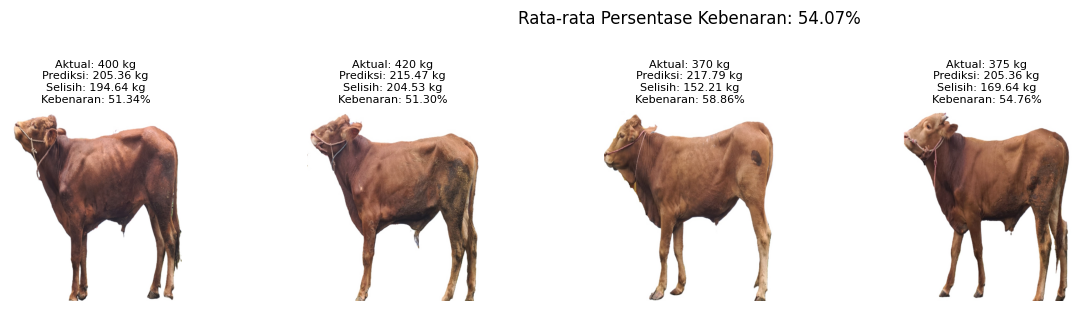

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/test.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/test'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()